In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# data files
file = "data/restaurants_data.csv"

# Read the mouse data and the study results
restaurants_df = pd.read_csv(file)
restaurants_df

,Name,Location,Status,Date,Unnamed: 4,Unnamed: 5
0,Paladar,Logan Square,Permanently closed,Mar-21,NaN,NaN
1,The Common Cup,Rogers Park,Temporary closed,Mar-21,NaN,NaN
2,No Bones Beach Club,Wicker Park,Permanently closed,Mar-21,NaN,NaN
3,Windy Kitty Cat Café and Lounge,Bucktown,Temporary closed,Mar-21,NaN,NaN
4,Don Juan Restaurante,Edison Park,Permanently closed,Mar-21,NaN,NaN
...,...,...,...,...,...,...
248,Monty Gael's Tavern and Grill,North Center,Permanently closed,May-20,NaN,NaN
249,Fat Rice,Logan Square,Permanently closed,May-20,NaN,NaN
250,The Windsor,Streetville,Permanently closed,May-20,NaN,NaN
251,D.O.C Wine Bar,Lombard,Permanently closed,May-20,NaN,NaN


In [2]:
# clean the dataset by getting rid of unecessary columns
restaurants_df = restaurants_df.drop(columns=['Unnamed: 4', 'Unnamed: 5'])
restaurants_df

,Name,Location,Status,Date
0,Paladar,Logan Square,Permanently closed,Mar-21
1,The Common Cup,Rogers Park,Temporary closed,Mar-21
2,No Bones Beach Club,Wicker Park,Permanently closed,Mar-21
3,Windy Kitty Cat Café and Lounge,Bucktown,Temporary closed,Mar-21
4,Don Juan Restaurante,Edison Park,Permanently closed,Mar-21
...,...,...,...,...
248,Monty Gael's Tavern and Grill,North Center,Permanently closed,May-20
249,Fat Rice,Logan Square,Permanently closed,May-20
250,The Windsor,Streetville,Permanently closed,May-20
251,D.O.C Wine Bar,Lombard,Permanently closed,May-20


In [3]:
# count all rows listed in the dataset
len(restaurants_df["Name"])

253

In [4]:
#count unique restaurants
len(restaurants_df['Name'].value_counts())

252

In [5]:
# look for duplicates
restaurants_df.duplicated(keep=False)
restaurants_df.loc[restaurants_df.duplicated(subset=["Name"]),"Name"].unique()

array(['Mesa Urbana'], dtype=object)

In [6]:
# Delete duplicate
restaurants_df[restaurants_df["Name"]== 'Mesa Urbana']

,Name,Location,Status,Date
12,Mesa Urbana,Portage Park,Temporary closed,Feb-21
229,Mesa Urbana,Glenview,Permanently closed,Jun-20


In [7]:
clean_data = restaurants_df.loc[restaurants_df['Name'] != "Mesa Urbana"]
clean_data

,Name,Location,Status,Date
0,Paladar,Logan Square,Permanently closed,Mar-21
1,The Common Cup,Rogers Park,Temporary closed,Mar-21
2,No Bones Beach Club,Wicker Park,Permanently closed,Mar-21
3,Windy Kitty Cat Café and Lounge,Bucktown,Temporary closed,Mar-21
4,Don Juan Restaurante,Edison Park,Permanently closed,Mar-21
...,...,...,...,...
248,Monty Gael's Tavern and Grill,North Center,Permanently closed,May-20
249,Fat Rice,Logan Square,Permanently closed,May-20
250,The Windsor,Streetville,Permanently closed,May-20
251,D.O.C Wine Bar,Lombard,Permanently closed,May-20


In [8]:
len(clean_data["Name"].value_counts())

251

## Restaurants Permanently closed vs Temporary closed: Pie Chart

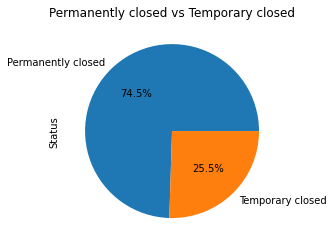

In [9]:
status_count = clean_data["Status"].value_counts()
status_count

#color of 
colors=["blue", "orange"]

#Create the pie based upon the values above
status_count.plot(kind="pie",autopct="%1.1f%%")

#Formatting
plt.title(" Restaurants Permanently closed vs Temporary closed")
plt.ylabel("Status")
plt.savefig("../Project_1/Piechart.png")
plt.show()

## Neighborhoods Affected: Bar Chart

In [10]:
# Count Neighbordhoods
# First rename the Location (raw data had a space after location), remove space
clean_data = clean_data.rename(columns = {"Location ": "Location"})
clean_data
clean_data["Location"]
# Location count
Location_count = clean_data["Location"].value_counts()
Location_count


River North     26
Wicker Park     14
Lakeview        12
Lincoln Park    12
Logan Square    10
                ..
West Ridge       1
Montclare        1
Rosemont         1
Bowmanville      1
Irving Park      1
Name: Location, Length: 76, dtype: int64

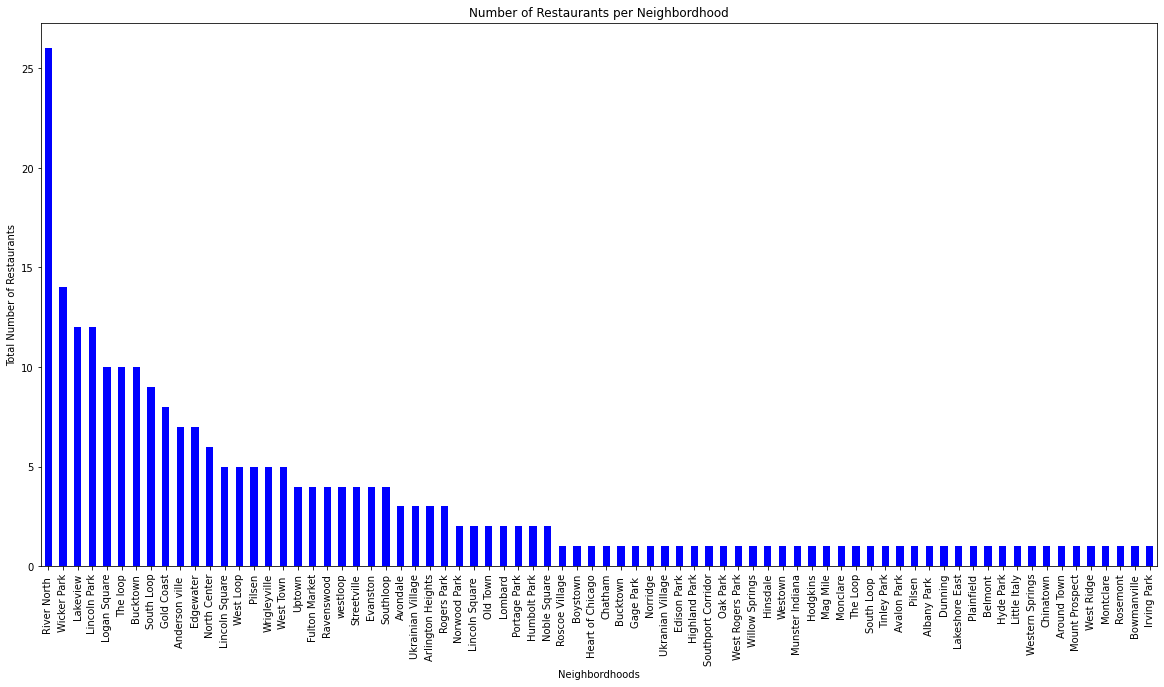

In [11]:
# Bar Chart
# insert out x and y axis 
y_axis= Location_count.values
x_axis= Location_count.index

#let's plot the chart
Location_count.plot(kind="bar", facecolor='blue',figsize=(20,10))

#let's format the chart
plt.ylabel("Total Number of Restaurants")
plt.xlabel("Neighbordhoods")
plt.title("Restaurants closing per Neighbordhood")
plt.xticks(rotation=90)
plt.savefig("../Project_1/Barchart.png")
plt.show()

## Restaurants closing per Month : Line chart 

In [12]:
# slice dataset to get only 2021 data
year21_df = clean_data[0:36]
year21_df

date21_count = year21_df["Date"].value_counts()
date21_count


Jan-21    14
Mar-21    11
Feb-21    11
Name: Date, dtype: int64

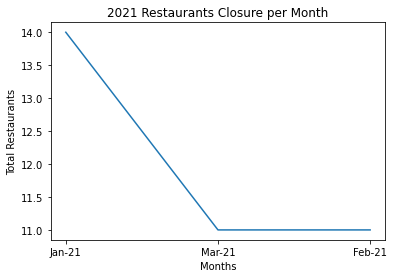

In [13]:
# set the y and X axis
y_axis= date21_count.values
x_axis= date21_count.index

# plot the graph
plt.title('2021 Restaurants Closure per Month')
plt.plot(x_axis, y_axis)
plt.xlabel('Months')
plt.ylabel('Total Restaurants')
plt.savefig("../Project_1/line_2021.png")
plt.show()

In [14]:
# Slice dataset to get only 2020 data
year20_df = clean_data[36:]
year20_df

date20_count = year20_df["Date"].value_counts()
date20_count

Sep-20    35
Nov-20    35
Jun-20    31
Dec-20    28
Oct-20    27
May-20    23
Jul-20    22
Aug-20    14
Name: Date, dtype: int64

In [15]:
# Put 2020 data into a frame
year20 = pd.DataFrame({'January': [0], 
                   'February': [0],
                   "March":[0],
                   'April':[0],
                   'May':[23],
                   'June':[31],
                   'July':[22],
                   'August':[14],
                   'September':[35],
                   'October':[27],
                   'November':[35],
                   'December':[28]})
                   
year20

                

,January,February,March,April,May,June,July,August,September,October,November,December
0,0,0,0,0,23,31,22,14,35,27,35,28


In [16]:
# Create line chart
x_axis = list(year20.keys())
y_axis = [0, 0,0,0,23,31,22,14,35,27,35,28]
plt.figure(figsize=(5,10)
plt.plot(x_axis, y_axis)
plt.title('2020 Restaurants Closure per Month')
plt.xlabel('Months')
plt.ylabel('Total Restaurants')
plt.xticks(rotation=45)
plt.savefig("../Project_1/line_2020.png")

SyntaxError: invalid syntax (<ipython-input-16-6454ccbf2919>, line 5)

### Mobility analysis

In [ ]:
# import mobility data file
mobility_file = "data/cookcounty_Mobility_Report.csv"

# Read the mouse data and the study results and convert date column 
mobility_df = pd.read_csv(mobility_file,parse_dates=["date"])
mobility_df

In [ ]:
# Filter for the Data
mobility_df.loc[:,"date":].set_index("date").plot(figsize=(15,15))
plt.axhline(y=0, color="blue")
plt.title('Mobility per Categories')
plt.savefig("../Project_1/graph.png")